In [63]:
import pandas as pd # importing all required libraries
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
df1 = pd.read_csv("Unemployment in India.csv") # loading the datasets
df2 = pd.read_csv("Unemployment_Rate_upto_11_2020.csv")

print("---- Dataset 1 Columns ----")
print(df1.columns)

print("\n---- Dataset 2 Columns ----")
print(df2.columns)


---- Dataset 1 Columns ----
Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

---- Dataset 2 Columns ----
Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')


In [66]:
# Clean column names: strip space
df1.columns = df1.columns.str.strip()
df2.columns = df2.columns.str.strip()

print(df1.columns)
print(df2.columns)


Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')
Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'longitude', 'latitude'],
      dtype='object')


In [65]:
df2 = df2.drop(columns=["Region.1"]) # deleting the duplicate column 
df2.head()


,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,15.9129,79.74


In [67]:
df1["Date"] = pd.to_datetime(df1["Date"], dayfirst=True) # convert date column
df2["Date"] = pd.to_datetime(df2["Date"], dayfirst=True)


In [68]:
df1.head() # data lookup

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural


In [69]:
df2.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),longitude,latitude
0,Andhra Pradesh,2020-01-31,M,5.48,16635535,41.02,15.9129,79.74
1,Andhra Pradesh,2020-02-29,M,5.83,16545652,40.90,15.9129,79.74
2,Andhra Pradesh,2020-03-31,M,5.79,15881197,39.18,15.9129,79.74
3,Andhra Pradesh,2020-04-30,M,20.51,11336911,33.10,15.9129,79.74
4,Andhra Pradesh,2020-05-31,M,17.43,12988845,36.46,15.9129,79.74


In [70]:
df1.info() # dataset information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   Region                                   740 non-null    object        
 1   Date                                     740 non-null    datetime64[ns]
 2   Frequency                                740 non-null    object        
 3   Estimated Unemployment Rate (%)          740 non-null    float64       
 4   Estimated Employed                       740 non-null    float64       
 5   Estimated Labour Participation Rate (%)  740 non-null    float64       
 6   Area                                     740 non-null    object        
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 42.1+ KB


In [71]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 8 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   Region                                   267 non-null    object        
 1   Date                                     267 non-null    datetime64[ns]
 2   Frequency                                267 non-null    object        
 3   Estimated Unemployment Rate (%)          267 non-null    float64       
 4   Estimated Employed                       267 non-null    int64         
 5   Estimated Labour Participation Rate (%)  267 non-null    float64       
 6   longitude                                267 non-null    float64       
 7   latitude                                 267 non-null    float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(2)
memory usage: 16.8+ KB


In [72]:
df1.isnull().sum() # checking for missing values

Region                                     28
Date                                       28
Frequency                                  28
Estimated Unemployment Rate (%)            28
Estimated Employed                         28
Estimated Labour Participation Rate (%)    28
Area                                       28
dtype: int64

In [73]:
df1 = df1.dropna(how="all") # handling missing values
df1.isnull().sum()

Region                                     0
Date                                       0
Frequency                                  0
Estimated Unemployment Rate (%)            0
Estimated Employed                         0
Estimated Labour Participation Rate (%)    0
Area                                       0
dtype: int64

In [74]:
df1.duplicated().sum() # checking for duplicates
df2.duplicated().sum()

np.int64(0)

In [75]:
df1.describe() # summary statistics

,Date,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740,740.000000,7.400000e+02,740.000000
mean,2019-12-12 18:36:58.378378496,11.787946,7.204460e+06,42.630122
min,2019-05-31 00:00:00,0.000000,4.942000e+04,13.330000
25%,2019-08-31 00:00:00,4.657500,1.190404e+06,38.062500
50%,2019-11-30 00:00:00,8.350000,4.744178e+06,41.160000
75%,2020-03-31 00:00:00,15.887500,1.127549e+07,45.505000
max,2020-06-30 00:00:00,76.740000,4.577751e+07,72.570000
std,NaN,10.721298,8.087988e+06,8.111094


In [76]:
df2.describe() # summary statistics

,Date,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),longitude,latitude
count,267,267.000000,2.670000e+02,267.000000,267.000000,267.000000
mean,2020-06-16 09:15:30.337078528,12.236929,1.396211e+07,41.681573,22.826048,80.532425
min,2020-01-31 00:00:00,0.500000,1.175420e+05,16.770000,10.850500,71.192400
25%,2020-03-31 00:00:00,4.845000,2.838930e+06,37.265000,18.112400,76.085600
50%,2020-06-30 00:00:00,9.650000,9.732417e+06,40.390000,23.610200,79.019300
75%,2020-08-31 00:00:00,16.755000,2.187869e+07,44.055000,27.278400,85.279900
max,2020-10-31 00:00:00,75.850000,5.943376e+07,69.690000,33.778200,92.937600
std,NaN,10.803283,1.336632e+07,7.845419,6.270731,5.831738


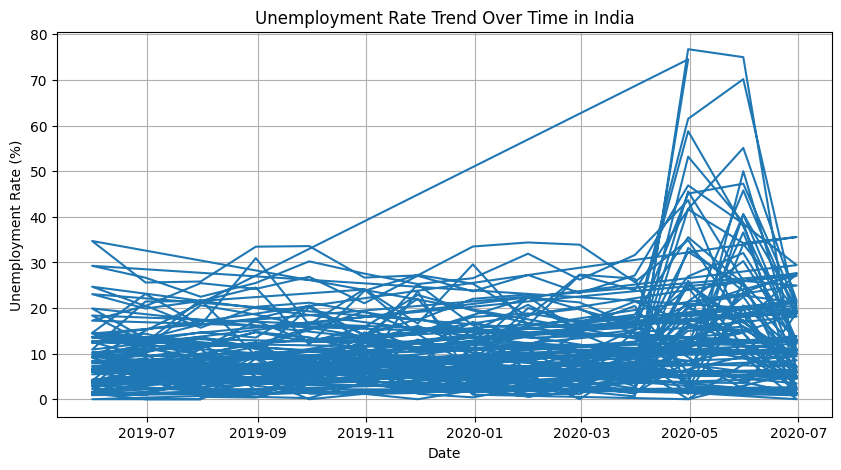

In [82]:
# Analysis for Trend over time 
plt.figure(figsize=(10,5))
plt.plot(df1["Date"], df1["Estimated Unemployment Rate (%)"]) #Plot the unemployment rate against time to visualize how it changes over time
plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")
plt.title("Unemployment Rate Trend Over Time in India")
plt.grid(True)
plt.show()

Unemployment Rate Trend Over Time:
This plot shows how the unemployment rate in India changed over time.
We can observe the fluctuations month by month, and any sudden spikes or drops indicate major events affecting employment.
This helps us understand the overall direction of unemployment and whether the situation improved or worsened over the given period.

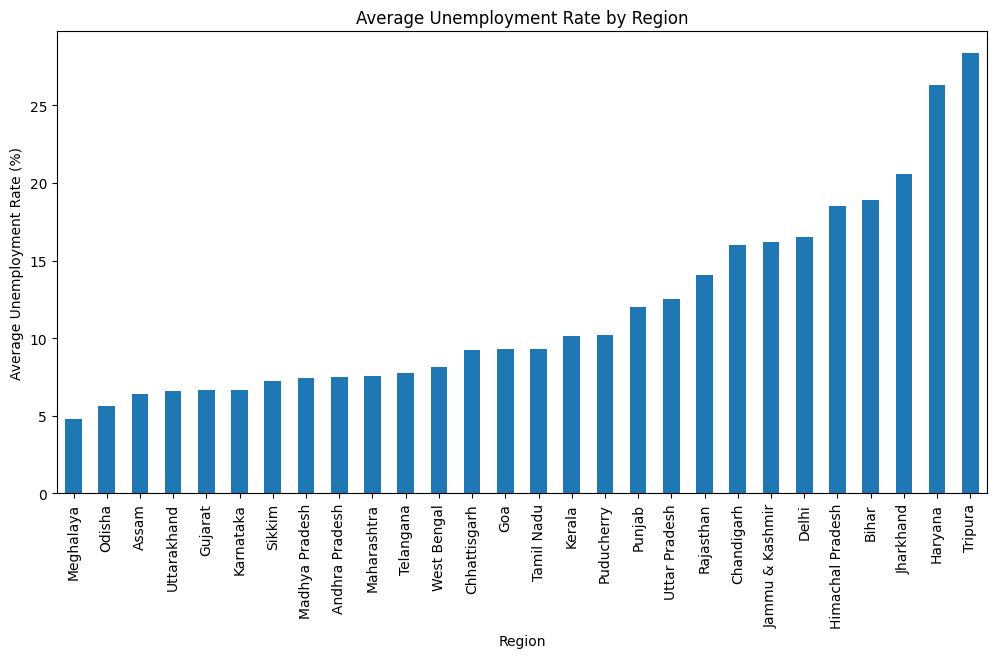

In [84]:
# Average Unemployment rate by region
region_mean = df1.groupby("Region")["Estimated Unemployment Rate (%)"].mean().sort_values() #Compute the average unemployment rate for each Region and sort the values

plt.figure(figsize=(12,6))
region_mean.plot(kind="bar") # Plot the regional averages as a bar chart
plt.ylabel("Average Unemployment Rate (%)")
plt.title("Average Unemployment Rate by Region")
plt.show()

Average Unemployment Rate by Region:
This bar chart compares the unemployment rate across different regions in India.
It highlights which regions have consistently higher unemployment and which ones perform better.
This allows us to identify region-specific employment issues and understand geographic patterns in unemployment.

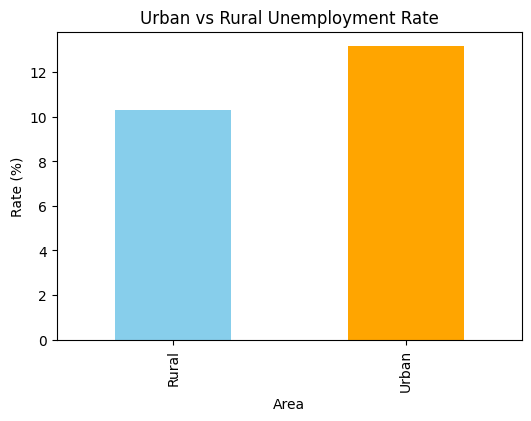

In [86]:
# Urban vs Rural 
area_mean = df1.groupby("Area")["Estimated Unemployment Rate (%)"].mean() # Calculate the average unemployment rate for Urban and Rural areas

plt.figure(figsize=(6,4))
area_mean.plot(kind="bar", color=["skyblue", "orange"]) # Plot the Urban vs Rural average unemployment rate
plt.title("Urban vs Rural Unemployment Rate")
plt.ylabel("Rate (%)")
plt.show()

Urban vs Rural Unemployment:
This chart compares the unemployment rate between Urban and Rural areas.
It helps us understand whether unemployment is more severe in cities or in rural regions.
The difference between the two categories reveals how economic opportunities vary based on area type.

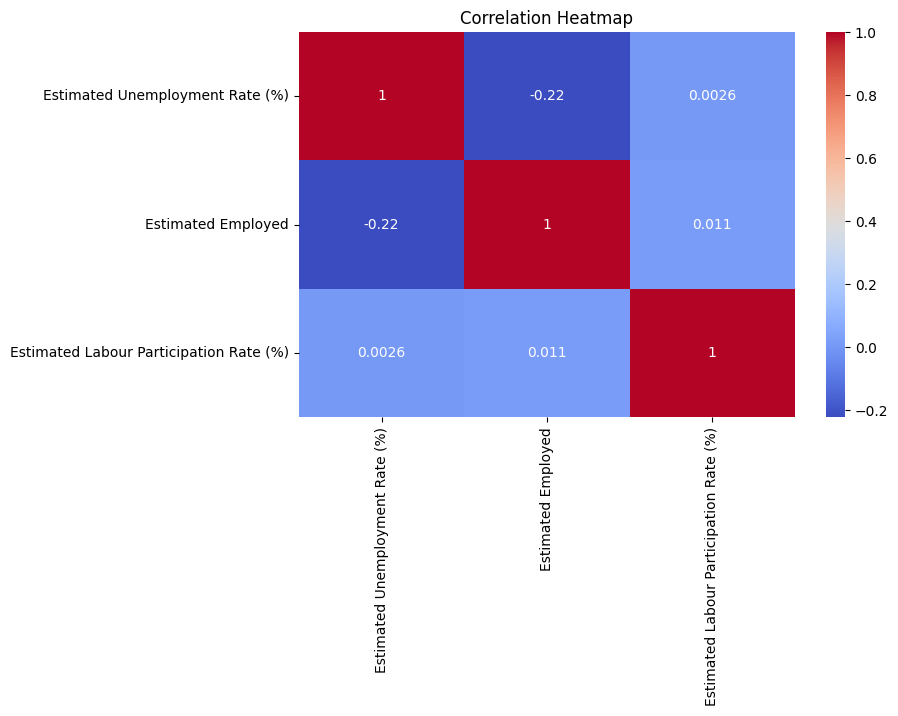

In [87]:
# Correlation Heatmap

# Select only numeric columns (correlation is calculated only for numerical data)
numeric_df = df1.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(8,5))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm") # Create a heatmap to visualize correlation between numeric features
plt.title("Correlation Heatmap")
plt.show()

Correlation Heatmap:
The heatmap shows the relationships between the numerical columns in the dataset.
A positive correlation means both values increase together, while a negative correlation means one increases when the other decreases.
This helps us understand which factors are strongly connected—for example, unemployment rate vs labour participation.

#Conclusion
The unemployment rate fluctuated significantly between 2019 and 2020, peaking during mid-2020. 
Rural areas showed lower unemployment than urban regions. 
Some variables such as labour participation and employed population showed moderate correlations.
